In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    random_state=42
)

In [3]:
X.shape, y.shape

((1000, 2), (1000,))

In [4]:
y = y.reshape(-1, 1)

In [5]:
y.shape

(1000, 1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800, 1), (200, 1))

### **Logistic Regression with Momentum**

In [10]:
class LogisticRegressionMomentum:
    def __init__(self, learning_rate, beta, epochs = 1000):
        self.learning_rate = learning_rate
        self.beta = beta 
        self.epochs = epochs

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    # Binary Cross-entropy (Log loss)
    def compute_loss(self, y, y_pred):
        epsilon = 1e-8 # To avoid log(0)
        return -np.mean(y * np.log(y_pred + epsilon) +  (1 - y) * np.log(1 - y_pred + epsilon))
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros((X.shape[1], 1))
        self.bias = 0

        # Initialize the velocities 
        v_w = np.zeros_like(self.weights)
        v_b = 0 

        self.losses = []

        for epoch in range(self.epochs):
            # Forward Pass 
            linear_output = np.dot(X, self.weights) + self.bias 
            y_pred = self.sigmoid(linear_output)

            # Compute Loss 
            loss = self.compute_loss(y, y_pred)
            self.losses.append(loss)

            # Gradients 
            d_w = np.dot(X.T, (y_pred - y)) / n_samples 
            d_b = np.mean(y_pred - y) 

            # Momentum Updates 
            v_w = self.beta * v_w + (1 - self.beta) * d_w
            v_b = self.beta * v_b + (1 - self.beta) * d_b

            self.weights -= self.learning_rate * v_w
            self.bias -= self.learning_rate * v_b

            if epoch % 100 == 0:
                print(f"Epochs {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_output)
        return (y_pred > 0.5).astype(int)

In [15]:
model = LogisticRegressionMomentum(learning_rate=0.1, beta=0.9, epochs=1000)

In [16]:
model.fit(X_train, y_train)

Epochs 0, Loss: 0.6931
Epochs 100, Loss: 0.3539
Epochs 200, Loss: 0.3446
Epochs 300, Loss: 0.3431
Epochs 400, Loss: 0.3428
Epochs 500, Loss: 0.3427
Epochs 600, Loss: 0.3427
Epochs 700, Loss: 0.3427
Epochs 800, Loss: 0.3427
Epochs 900, Loss: 0.3427


In [20]:
# Prediction 
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", acc)

Test Accuracy: 0.88


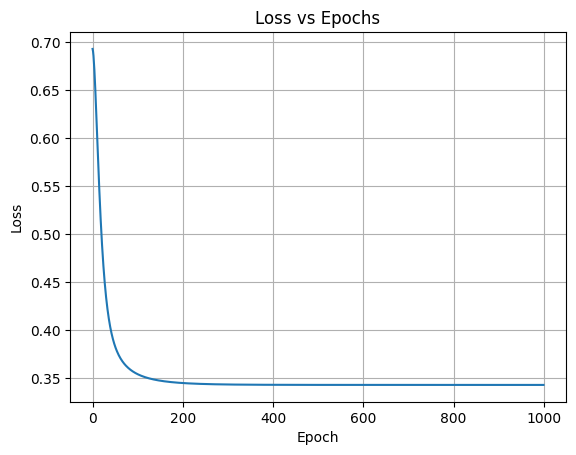

In [21]:
plt.plot(model.losses)
plt.title("Loss vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Loss function: f(x, y) = x^2 + 10y^2
def loss(x, y):
    return x**2 + 10 * y**2

# Gradient of the loss
def grad(x, y):
    return np.array([2 * x, 20 * y])

# Parameters
lr = 0.1
momentum = 0.9
x, y = 2.0, 2.0
v = np.array([0.0, 0.0])

# Store path for animation
path = [(x, y)]

# Run optimization with momentum
for _ in range(50):
    g = grad(x, y)
    v = momentum * v - lr * g
    x, y = x + v[0], y + v[1]
    path.append((x, y))

# Setup plot
fig, ax = plt.subplots()
X, Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
Z = loss(X, Y)
ax.contour(X, Y, Z, levels=30)
dot, = ax.plot([], [], 'ro')
line, = ax.plot([], [], 'b--', alpha=0.7)
ax.set_title("Momentum Optimization")

xs, ys = [], []
# ... existing code ...

def update(frame):
    xs.append(path[frame][0])
    ys.append(path[frame][1])
    # Convert single points to sequences for plotting
    dot.set_data([xs[-1]], [ys[-1]])  # Wrap in lists to make sequences
    line.set_data(xs, ys)
    return dot, line

# ... existing code ...

ani = FuncAnimation(fig, update, frames=len(path), interval=100, blit=True)

# Save as GIF
ani.save("momentum.gif", writer=PillowWriter(fps=10))
plt.close()

In [25]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.cm as cm

# Loss function: f(x, y) = x^2 + 10y^2
def loss(x, y):
    return x**2 + 10 * y**2

# Gradient of the loss
def grad(x, y):
    return np.array([2 * x, 20 * y])

# Parameters
lr = 0.1
momentum = 0.9
x, y = 2.0, 2.0
v = np.array([0.0, 0.0])

# Store path for animation
path = [(x, y)]

# Run optimization with momentum
for _ in range(50):
    g = grad(x, y)
    v = momentum * v - lr * g
    x, y = x + v[0], y + v[1]
    path.append((x, y))

# Setup plot with improved aesthetics
plt.style.use('ggplot')  # Using a built-in style that gives a clean look
fig, ax = plt.subplots(figsize=(10, 8))

# Create contour plot with better colormap
X, Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
Z = loss(X, Y)
contour = ax.contour(X, Y, Z, levels=30, cmap='viridis', alpha=0.6)
plt.colorbar(contour, ax=ax, label='Loss Value')

# Initialize plot elements
dot, = ax.plot([], [], 'ro', markersize=10, label='Current Position')
line, = ax.plot([], [], 'b-', alpha=0.7, linewidth=2, label='Optimization Path')
velocity_arrow, = ax.plot([], [], 'g->', linewidth=2, markersize=10, label='Velocity')

# Set plot properties
ax.set_title("Momentum Optimization Visualization", fontsize=14, pad=20)
ax.set_xlabel("X", fontsize=12)
ax.set_ylabel("Y", fontsize=12)
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right')

# Store animation data
xs, ys = [], []
vx, vy = [], []

def update(frame):
    # Update position
    xs.append(path[frame][0])
    ys.append(path[frame][1])
    
    # Calculate velocity for arrow
    if frame < len(path) - 1:
        vx = path[frame+1][0] - path[frame][0]
        vy = path[frame+1][1] - path[frame][1]
        velocity_arrow.set_data([path[frame][0], path[frame][0] + vx], 
                              [path[frame][1], path[frame][1] + vy])
    
    # Update plot elements
    dot.set_data([xs[-1]], [ys[-1]])
    line.set_data(xs, ys)
    
    return dot, line, velocity_arrow

# Create animation with improved settings
ani = FuncAnimation(fig, update, frames=len(path), interval=100, blit=True)

# Save as high-quality GIF
ani.save("momentum_optimization.gif", writer=PillowWriter(fps=10, bitrate=1800))
plt.close()